In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
df = pd.read_csv("foods_lang.csv", low_memory=False)

In [7]:
from collections import Counter
dic = Counter(df.lang).most_common()

In [21]:
other = 0
labels = []
counts = []
for label, cnt in dic:
    if cnt > 1000:
        labels.append(label.upper())
        counts.append(cnt)
    else:
        other += cnt

labels.append("Other")
counts.append(other)

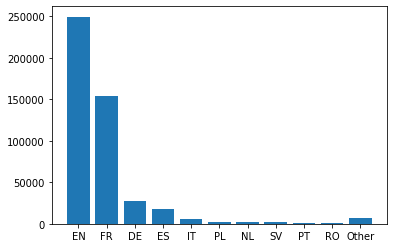

In [28]:
plt.bar(range(len(labels)), counts, align='center')
plt.xticks(range(len(labels)), labels)
# plt.show()
plt.savefig("languages.jpeg", bbox_inches='tight')

In [25]:
plt.savefig("plots/languages.jpeg", bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [3]:
df = df[df["lang"] == "en"]

In [4]:
df = df[["ingredients_text", "additives_n", "nutriscore_score", "nutriscore_grade", "fat_100g", "saturated-fat_100g", "carbohydrates_100g", "sugars_100g", "proteins_100g", "salt_100g"]]

In [5]:
df.dropna(subset=["fat_100g", "saturated-fat_100g", "carbohydrates_100g", "sugars_100g", "proteins_100g", "salt_100g"], inplace=True)

In [6]:
import re
def extract_ingredients(text):
    text = re.split(", | \(|\)|\[|\]", text)
    text = [x.replace("from ", "") for x in text]
    text = [x.replace("_", "") for x in text]
    text = [re.sub(r'\d+\.\d+%', "", x) for x in text]
    text = [re.sub(r'\d+\,\d+%', "", x) for x in text]
    text = [re.sub(r'\d+%', "", x) for x in text]
    text = [re.sub("^\s+|\s+$", "", x, flags=re.UNICODE) for x in text]
    text = [x.replace(".", "") for x in text]
    text = [x.replace("fd&c ", "") for x in text]
    text = [x for x in text if len(x) > 1]
    text = [x.lower() for x in text]
    return text

In [7]:
products = []
for x in list(df["ingredients_text"]):
     products.append(extract_ingredients(x))

In [8]:
ingredients = []
for p in products:
    ingredients += p

In [30]:
from collections import Counter
grade = Counter(df["nutriscore_score"])

In [31]:
labels = []
counts = []
for l, c in grade.items():
    labels.append(l)
    counts.append(c)
counts

[8258,
 7694,
 6991,
 10427,
 11068,
 13710,
 5307,
 5845,
 11055,
 10265,
 6393,
 3277,
 10717,
 7051,
 8959,
 2712,
 8190,
 5003,
 1820,
 5165,
 695,
 4761,
 4702,
 4796,
 1577,
 7544,
 8934,
 6763,
 671,
 9306,
 6948,
 5365,
 6050,
 10852,
 7988,
 4289,
 4289,
 500,
 2270,
 193,
 268,
 121,
 54,
 92,
 132,
 34,
 81,
 17,
 39,
 12,
 4,
 1,
 1]

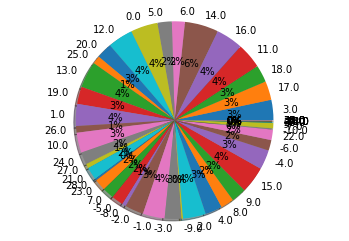

In [32]:
plt.pie(counts, labels=labels, autopct="%1.0f%%", shadow=True)
plt.axis('equal')
# plt.show()
plt.savefig("plots/grades.jpeg", bbox_inches='tight')

In [27]:
plt.savefig("plots/grades.jpeg", bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

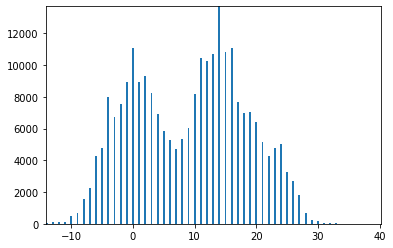

In [48]:
ax = plt.subplot(111)
ax.bar(labels, counts, width=0.3, align='center')
ax.autoscale(tight=True)
plt.savefig("plots/scores.jpeg", bbox_inches='tight')

In [35]:
len(scores)

53